In [267]:
import numpy as np

In [268]:
import matplotlib.pyplot as plt

In [269]:
np.random.seed(0)#设置一个种子让我们每次取的值都是一样的
Num = 100

In [270]:
# X(x1,x2) y 0/1  数据集
# y = 1
x_1 = np.random.normal(6,1,size=(Num)) # 三个参数分别是 中心点 方差 多大
x_2 = np.random.normal(3,1,size=(Num))
#x_2
y = np.ones(Num)     
#y
c_1 = np.array([x_1,x_2,y])# 三行100列 不方便看 转变为3列100行在后面
c_1.shape
# c_1

(3, 100)

In [271]:
# y = 0
x_1 = np.random.normal(3,1,size=(Num)) # 三个参数分别是 中心点 方差 多大
x_2 = np.random.normal(6,1,size=(Num)) #不让他们重合 这里将他们反过来
#x_2
y = np.zeros(Num)     
#y
c_0 = np.array([x_1,x_2,y])# 三行100列
c_0.shape

(3, 100)

In [272]:
c_1 = c_1.T
c_0 = c_0.T
# c_1
# c_0

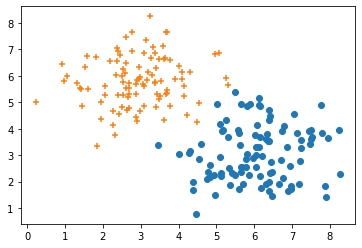

In [273]:
plt.scatter(c_1[:,0],c_1[:,1])
plt.scatter(c_0[:,0],c_0[:,1],marker = '+')

In [274]:
All_data = np.concatenate((c_1,c_0))
All_data.shape  #在行上进行拼接所以变成200,3

(200, 3)

In [275]:
np.random.shuffle(All_data)#,将这个200行打乱,一般是shuffle第一个维度也就是行

In [276]:
train_data_X = All_data[:150,:2]#取前150个 头两列 []  :2 一边闭合一边开是一个区间
train_data_y = All_data[:150,-1] #-1就是去最后一列也可以写3
test_data_X = All_data[150:,:2] #取后50个
test_data_y = All_data[150:,-1]
train_data_X.shape,train_data_y.shape,test_data_X.shape,test_data_y.shape

((150, 2), (150,), (50, 2), (50,))

In [277]:
 # y = w1*x1 + w2*x2
W = np.random.rand(2,1)
W

array([[0.05853492],
       [0.4706209 ]])

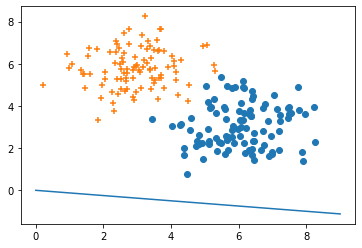

In [278]:
 # y = w1*x1 + w2*x2 = 0
 # w1 *x + w2*y=0 在这里x1变成了x,x2变成了y
plt.scatter(c_1[:,0],c_1[:,1])
plt.scatter(c_0[:,0],c_0[:,1],marker = '+')
x = np.arange(10)
y = -(W[0]*x)/W[1]
plt.plot(x,y)

In [279]:
#定义损失函数 交叉熵
def cross_entropy(y,y_hat):
    return -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [280]:
# y_hat = sigmoid(w*x)
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [281]:
W.shape,train_data_X.shape

((2, 1), (150, 2))

In [282]:
lr = 0.001#学习率
loss_ = []
for i  in range(1000):
    #计算loss
    y_hat = sigmoid(np.dot(W.T,train_data_X.T))
    loss = cross_entropy(train_data_y,y_hat)
    #计算梯度
    grad = - np.mean((train_data_X*(train_data_y-y_hat).T),axis = 0 )
    #更新W
    W = W - (lr*grad).reshape(2,1)
    #输出loss
    loss_.append(loss)
    if i%100 == 1:
        print('i:%d, loss: %f'%(i,loss))
    if loss<0.1:
        break

i:1, loss: 1.550297
i:101, loss: 1.015961
i:201, loss: 0.773526
i:301, loss: 0.646451
i:401, loss: 0.559007
i:501, loss: 0.492438
i:601, loss: 0.440117
i:701, loss: 0.398211
i:801, loss: 0.364087
i:901, loss: 0.335871


In [283]:
W

array([[ 0.37115813],
       [-0.36219734]])

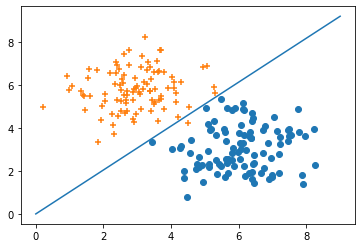

In [284]:
plt.scatter(c_1[:,0],c_1[:,1])
plt.scatter(c_0[:,0],c_0[:,1],marker = '+')
x = np.arange(10)
y = -(W[0]*x)/W[1]
plt.plot(x,y)

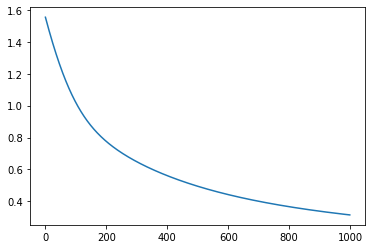

In [285]:
plt.plot(loss_)

In [286]:
#预测
# y_hat = w1*x1+w2*x2 
test_data_X.shape

(50, 2)

In [287]:
y_hat = np.dot(W.T,test_data_X.T)
y_pred = np.array(y_hat>0,dtype=int).flatten()
test_acc = np.sum(test_data_y==y_pred)/len(y_pred)
test_acc

1.0

(1, 3)